In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import efficient_bennett as eb

from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())
FIGSIZE = [5.5, 3.399186938124422]

# For mean squared error

In [ ]:
# MSE approximation
max_n = 10000
factor_off_list = [1.0, 1.001, 1.01, 1.1, 1.4]

n_vec = np.arange(50, max_n + 1, 50)
df = pd.DataFrame(columns=factor_off_list, index=n_vec)

for factor_off in factor_off_list:
    w = 2
    print(f"Doing factor_off={factor_off}")
    for n in n_vec:

        B = eb.bennett_matrix(n)
        target_error = factor_off * eb.get_mse(B, B)
        our_error = 1000 * target_error
        space = None

        while our_error > target_error :

            c = 1 - 1 / w

            L, R, space = eb.approx_bennett_mm(n, c=c, w=w)
            our_error = eb.get_mse(L, R)
            if our_error > target_error:
                w += 1
            print(w, c)

        df.at[factor_off, n].append(space)
        print(f'n={n} done w/ space={space}!')

In [148]:
df = pd.read_csv('data/mse_n_vs_space_for_approx.csv', index_col=0)
df.columns = [float(x) for x in df.columns]
df

,1.000,1.001,1.010,1.100,1.400
50,7,7,7,6,4
100,11,11,9,6,5
150,13,13,9,7,5
200,16,14,12,8,5
250,16,16,13,8,5
...,...,...,...,...,...
9800,51,43,23,12,7
9850,51,43,23,12,7
9900,51,43,23,12,7
9950,51,43,23,12,7


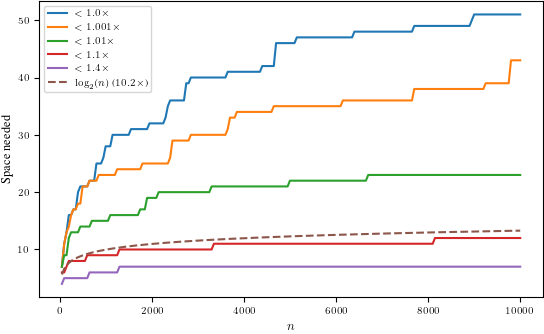

In [122]:
factors_to_plot = [1.0, 1.001, 1.01, 1.1, 1.4]
plt.figure()
# plt.title(f"Space needed for ${factor_off}$-approximation of MSE")
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$')
plt.plot(df.index, np.log2(df.index), label='$\\log_2(n)$ ($10.2\\times$)', ls='--')
plt.xlabel('$n$')
plt.ylabel('Space needed')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('plots/mse_n_vs_space_needed_for_approx.pdf')
plt.show()

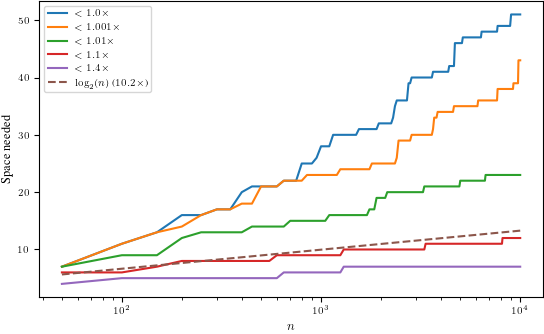

In [123]:
factors_to_plot = [1.0, 1.001, 1.01, 1.1, 1.4]
plt.figure()
# plt.title(f"Space needed for ${factor_off}$-approximation of MSE")
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$')
plt.plot(df.index, np.log2(df.index), label='$\\log_2(n)$ ($10.2\\times$)', ls='--')
plt.xlabel('$n$')
plt.ylabel('Space needed')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.savefig('plots/mse_n_vs_space_needed_for_approx_logscale.pdf')
plt.show()

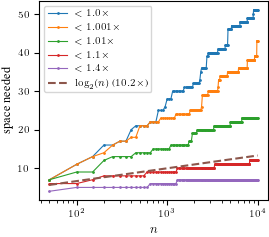

In [150]:
factors_to_plot = [1.0, 1.001, 1.01, 1.1, 1.4]
plt.figure(figsize=(FIGSIZE[0] / 2, FIGSIZE[1]/1.4))
# plt.title(f"Space needed for ${factor_off}$-approximation of MSE")
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$', ls='-', marker='.', ms=2, lw=0.8)
plt.plot(df.index, np.log2(df.index), label='$\\log_2(n)$ ($10.2\\times$)', ls='--')
plt.xlabel('$n$')
plt.ylabel('space needed')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.savefig('plots/mse_n_vs_space_needed_for_approx_logscale_2x.pdf')
plt.show()

In [2]:
N = 10000
space_vec = []
approx_vec = []

ws = np.arange(2, 100, 1)
df = pd.DataFrame(index=ws, columns=['space', 'approx'])

# MSE approximation
B = eb.bennett_matrix(N)
baseline_mse = eb.get_mse(B, B)

for w in ws:

    c = 1 - 1 / w
    L, R, space = eb.approx_bennett_mm(N, c=c, w=w, perform_extra_checks=True)
    our_mse = eb.get_mse(L, R)

    df.at[w, 'approx'] = our_mse / baseline_mse
    df.at[w, 'space'] = space

    print(w, space)

df.to_csv(f'data/mse_space_vs_approx_n{N}.csv')

2 7
3 12
4 16


KeyboardInterrupt: 

In [143]:
df100 = pd.read_csv('data/mse_space_vs_approx_n100.csv', index_col=0)
df1000 = pd.read_csv('data/mse_space_vs_approx_n1000.csv', index_col=0)
df10000 = pd.read_csv('data/mse_space_vs_approx_n10000.csv', index_col=0)
# df.columns = [float(x) for x in df.columns]
df

,space,approx
2,5,1.13549
3,6,1.023812
4,9,1.006038
5,11,0.999844
6,12,0.996968
...,...,...
95,96,0.999967
96,97,0.99998
97,98,0.99999
98,99,0.999997


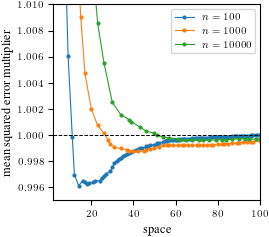

In [145]:
plt.figure(figsize=(FIGSIZE[0]/2, FIGSIZE[1]/1.4))
plt.plot(df100['space'], df100['approx'], marker='.', ms=4, lw=0.8, label='$n=100$')
plt.plot(df1000['space'], df1000['approx'], marker='.', ms=4, lw=0.8, label='$n=1000$')
plt.plot(df10000['space'], df10000['approx'], marker='.', ms=4, lw=0.8, label='$n=10000$')
plt.xlabel('space')
plt.ylabel('mean squared error multiplier')
plt.ylim([0.995, 1.01])
plt.xlim([2, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.savefig('plots/multiplier_vs_space_n100_1000_10000_2x.pdf')
plt.show()

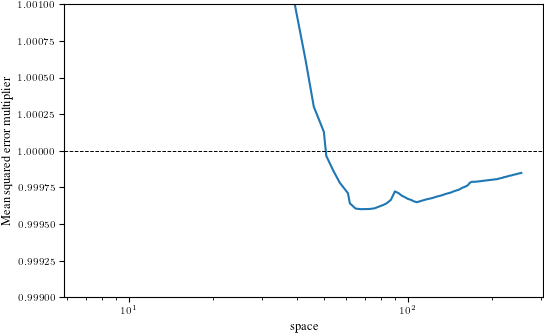

In [80]:
plt.figure()
plt.plot(df['space'], df['approx'])
plt.xlabel('space')
plt.ylabel('Mean squared error multiplier')
plt.ylim([0.999, 1.001])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
plt.xscale('log')
ax2.plot(df.index, df['approx'])
plt.show()

# For maximum square root error

In [2]:
# MSE approximation
max_n = 10000
factor_off_list = [1.0, 1.001, 1.01, 1.1, 1.4]

n_vec = np.arange(50, max_n + 1, 50)
our_space = {f : list() for f in factor_off_list}

for factor_off in factor_off_list:
    w = 2
    print(f"Doing factor_off={factor_off}")
    for n in n_vec:

        B = eb.bennett_matrix(n)
        target_error = factor_off * eb.get_max_rse(B, B)
        our_error = 1000 * target_error
        space = None

        while our_error > target_error :

            c = 1 - 1 / w

            L, R, space = eb.approx_bennett_mm(n, c=c, w=w)
            our_error = eb.get_max_rse(L, R)
            if our_error > target_error:
                w += 1
            print(w, c)

        our_space[factor_off].append(space)
        print(f'n={n} done w/ space={space}!')

2 7
3 12
4 16
5 20
6 23
7 26
8 30
9 34
10 38
11 39
12 43
13 46
14 50
15 51
16 54
17 57
18 61
19 62
20 65
21 68
22 71
23 73
24 76
25 79
26 82
27 84
28 87
29 90
30 93
31 95
32 98
33 100
34 103
35 105
36 108
37 110
38 113
39 115
40 117
41 120
42 123
43 125
44 127
45 130
46 133
47 135
48 137
49 140
50 143
51 145
52 147
53 150
54 153
55 155
56 157
57 160
58 163
59 165
60 167
61 170
62 173
63 175
64 177
65 179
66 182
67 184
68 186
69 188
70 191
71 193
72 195
73 197
74 200
75 202
76 204
77 206
78 209
79 211
80 212
81 215
82 218
83 220
84 221
85 224
86 227
87 229
88 230
89 233
90 236
91 238
92 239
93 242
94 245
95 247
96 248
97 251
98 254
99 256


In [ ]:
plt.figure()
for factor_off in factor_off_list:
    plt.plot(n_vec, our_space[factor_off], label=f'{factor_off}-approx.')
plt.xlabel('n')
plt.ylabel('Space needed')
plt.legend()
# plt.xscale('log')
plt.show()

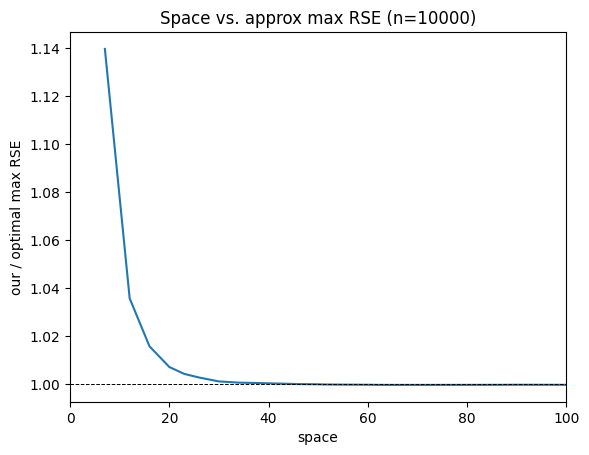

In [3]:

plt.figure()
plt.title(f"Space vs. approx max RSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal max RSE')
# plt.ylim([0.6, 1.01])
plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

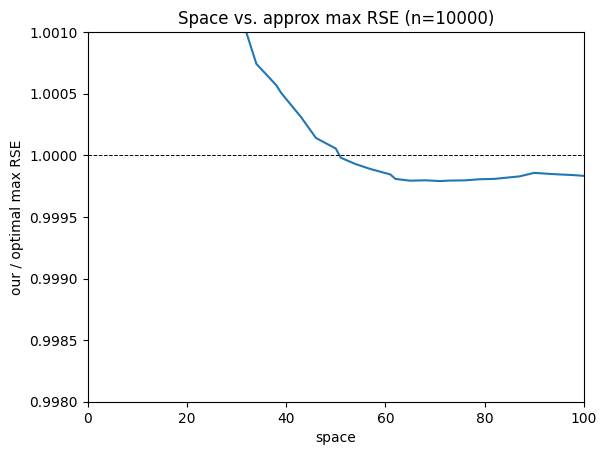

In [7]:

plt.figure()
plt.title(f"Space vs. approx max RSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal max RSE')
plt.ylim([0.998, 1.001])
plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.show()